In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

## Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

In [2]:
df= pd.read_csv('Exog_Campaign_eng')
df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [3]:
df2= pd.read_csv('train_1.csv')
df2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df2.shape

(145063, 551)

In [5]:
df2.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [6]:
df2.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [7]:
page=df2['Page'].str.rsplit("_", n=3, expand=True)
page.columns= ['Name','wiki','acc_tpe','acc_origin']



In [8]:
page.head()

,Name,wiki,acc_tpe,acc_origin
0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM,zh.wikipedia.org,all-access,spider
2,3C,zh.wikipedia.org,all-access,spider
3,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


In [9]:
import re
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

In [10]:
x = []
for i in page['wiki']:
    x.append(find_language(i))

In [11]:
page['lang'] = x

In [12]:
page.head()

,Name,wiki,acc_tpe,acc_origin,lang
0,2NE1,zh.wikipedia.org,all-access,spider,zh
1,2PM,zh.wikipedia.org,all-access,spider,zh
2,3C,zh.wikipedia.org,all-access,spider,zh
3,4minute,zh.wikipedia.org,all-access,spider,zh
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,zh


In [13]:
page.lang.value_counts()

en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: lang, dtype: int64

In [14]:
train=pd.melt(df2[list(df2.columns[-5:])+['Page']],id_vars='Page',var_name='date',value_name='Visits')

In [15]:
result = pd.concat([page,df2], axis=1, join='inner')

In [16]:
result.drop('Page',axis=1, inplace=True)

In [17]:
result

,Name,wiki,acc_tpe,acc_origin,lang,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh.wikipedia.org,all-access,spider,zh,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh.wikipedia.org,all-access,spider,zh,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh.wikipedia.org,all-access,spider,zh,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh.wikipedia.org,all-access,spider,zh,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,zh,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas),es.wikipedia.org,all-access,spider,es,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final,es.wikipedia.org,all-access,spider,es,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón,es.wikipedia.org,all-access,spider,es,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre,es.wikipedia.org,all-access,spider,es,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis


In [18]:
lang_set= {}
lang_set['en'] = result[result.lang=='en'].iloc[:,0:-1]
lang_set['ja'] = result[result.lang=='ja'].iloc[:,0:-1]
lang_set['de'] = result[result.lang=='de'].iloc[:,0:-1]
lang_set['fr'] = result[result.lang=='fr'].iloc[:,0:-1]
lang_set['ru'] = result[result.lang=='ru'].iloc[:,0:-1]
lang_set['es'] = result[result.lang=='es'].iloc[:,0:-1]
lang_set['zh'] = result[result.lang=='zh'].iloc[:,0:-1]
lang_set['na'] = result[result.lang=='na'].iloc[:,0:-1]

In [19]:
total_view= {}
for key in lang_set:
    total_view[key] = lang_set[key].iloc[:,5:].sum(axis=0)/lang_set[key].shape[0]

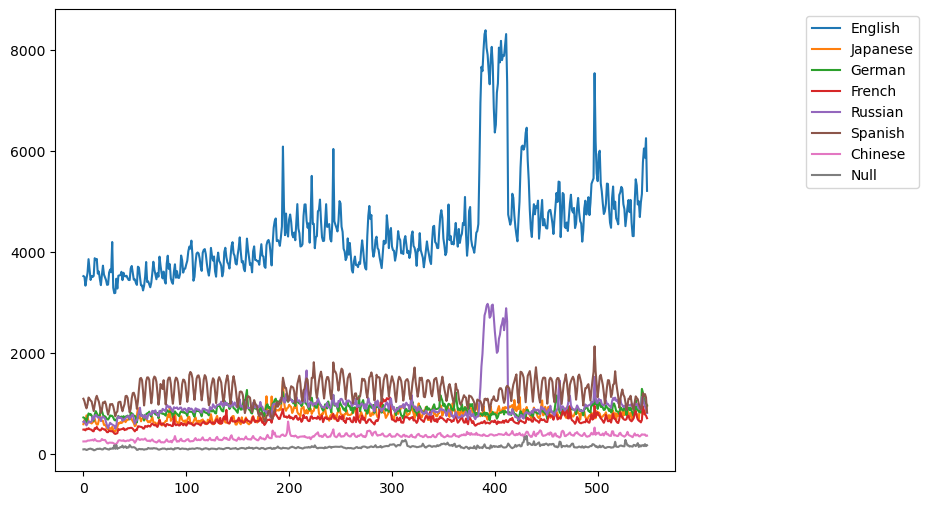

In [20]:
days= [r for r in range(total_view['en'].shape[0])]

plt.figure(figsize=(8,6))
labels = {'ja':'Japanese','de':'German','en':'English','no_lang':'Media_file','fr':'French','zh':'Chinese',
          'ru':'Russian','es':'Spanish','na':'Null'}
          
for key in total_view:
          plt.plot(days,total_view[key],label = labels[key])
plt.legend(loc = 'upper left', bbox_to_anchor = (1.2,1))
plt.show()

In [21]:
train

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-12-27,20.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-12-27,30.0
2,3C_zh.wikipedia.org_all-access_spider,2016-12-27,4.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-12-27,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-12-27,11.0
...,...,...,...
725310,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
725311,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,NaN
725312,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,NaN
725313,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,NaN


## Checking stationarity


Null hypothesis: TS is non-stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the Critical Value', we can reject the null hypothesis and say that the series is stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):
    
    #Determing rolling statistics
    rolmean = x.rolling(window=22, center=False).mean()
    rolstd = x.rolling(window =12, center=False).std()
    
    #plot rolling statistics
    
    orig = plt.plot(x.values, color = 'blue', label= 'Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color = 'black', label= 'Rolling Std')
    plt.legend(loc= 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey fuller test
    result=adfuller(x)
    print('ADF Statstics: %f'%result[0])
    print('p-value:%f'%result[1])
    pvalue=result[1]
    for key, value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' %(key, value))
    

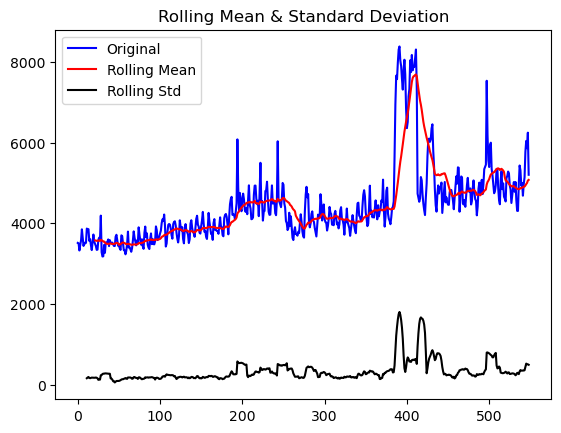

ADF Statstics: -2.245201
p-value:0.190251
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [23]:
test_stationarity(total_view['en'])

In [24]:
ts_log = np.log(total_view['en'])
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, model='multiplicative',period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

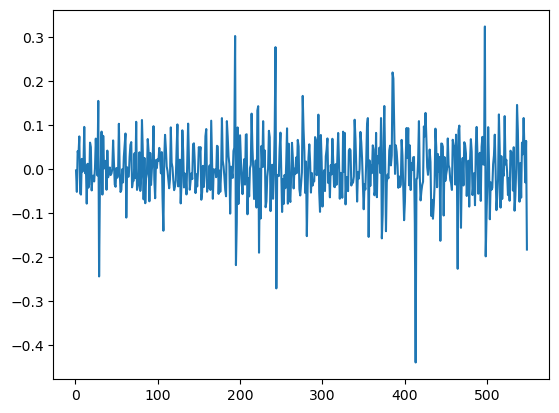

In [25]:
# Diffrencing the price
ts_log_diff= ts_log - ts_log.shift()
plt.plot(ts_log_diff.values)
plt.show()

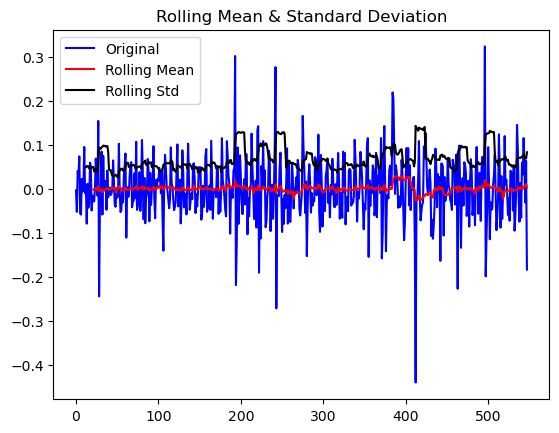

ADF Statstics: -8.130271
p-value:0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [26]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

The ADF statistic is much lesser than critical value at 1%. So there is 99% confidence interval that our graph is now stationery. Now we can apply the ARIMA model



Plotting the ACF and PACF plots


In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

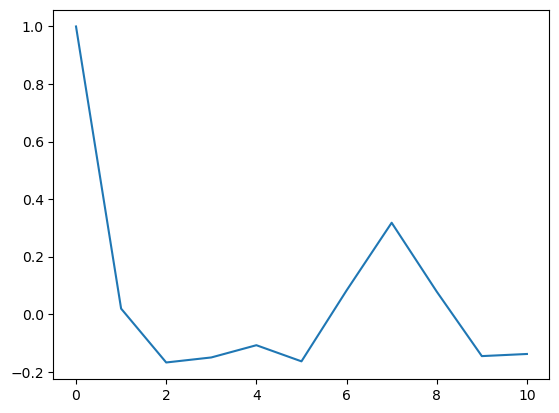

In [28]:
plt.plot(lag_acf)
plt.show()

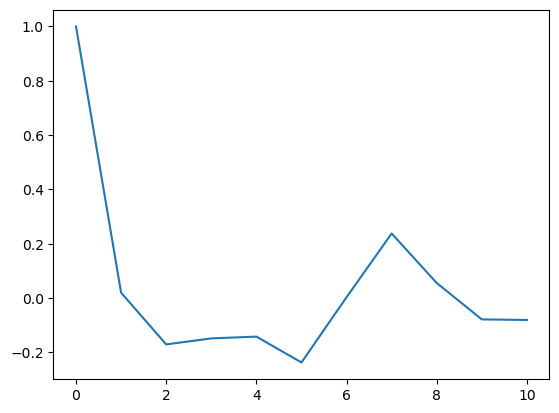

In [29]:
plt.plot(lag_pacf)
plt.show()

## Creating model training and forecasting with ARIMA, SARIMAX

In [30]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_log.values, order=(0,1,1))  
results_ARIMA = model.fit()  

In [31]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_value = output[0]
    original_value = test_arima[t]
    history.append(original_value)
    pred_value = np.exp(pred_value)
    original_value = np.exp(original_value)
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

C:\Users\5040876\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 Means Error in Predicting Test Case Articles : 5.383660  %


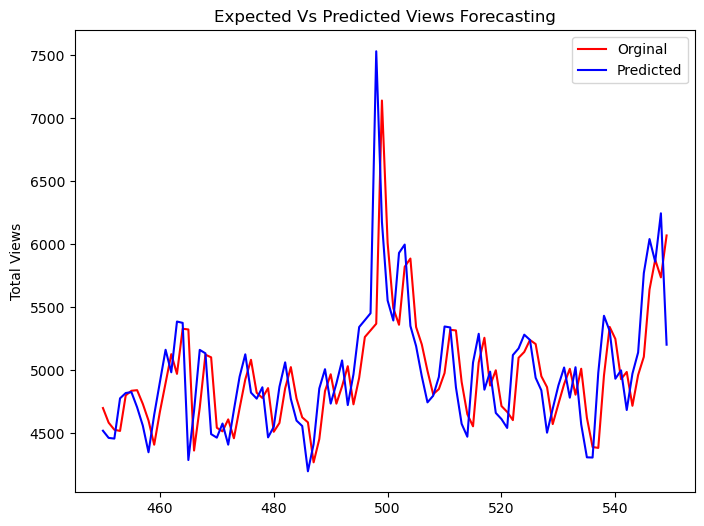

In [32]:
plt.figure(figsize=(8, 6))
test_day = [t+450 for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(test_day, originals, color = 'blue')
plt.title('Expected Vs Predicted Views Forecasting')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

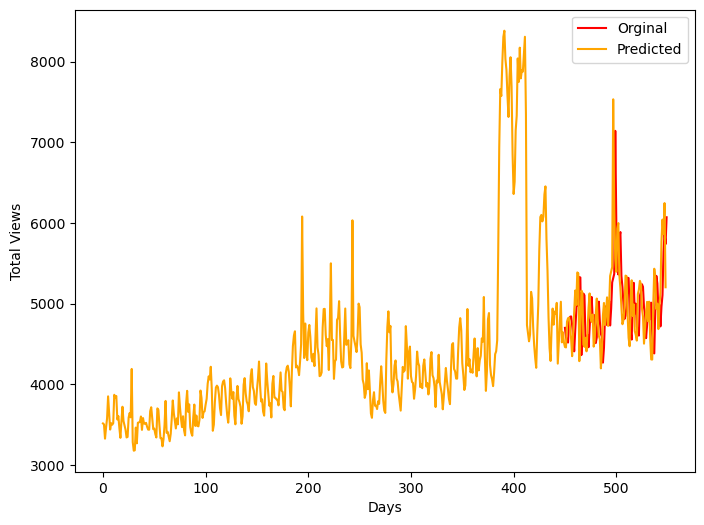

In [33]:
plt.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(days, total_view['en'], color = 'orange')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

In [34]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  549
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 682.259
Date:                Sun, 17 Mar 2024   AIC                          -1360.518
Time:                        17:57:24   BIC                          -1351.905
Sample:                             0   HQIC                         -1357.151
                                - 549                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0293      0.028      1.052      0.293      -0.025       0.084
sigma2         0.0049      0.000     30.542      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [35]:
sxmodel = pm.auto_arima(ts_log.values, exogenous=df['Exog'],start_p=1, start_q=1,test='adf',max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=None, D=1, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-419.959, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-1078.979, Time=0.73 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-420.260, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-930.994, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1206.715, Time=2.09 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-526.410, Time=1.02 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-1205.558, Time=3.08 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-1205.781, Time=2.66 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-910.511, Time=1.46 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-1204.586, Time=4.61 sec
 ARIMA(1,0,0)(2,1,0)[12]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  549
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 608.080
Date:                            Sun, 17 Mar 2024   AIC                          -1208.159
Time:                                    17:58:00   BIC                          -1191.015
Sample:                                         0   HQIC                         -1201.452
                                            - 549                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8687      0.017     51.313      0.000       0.835       0.902
ar.S.L12      -0.7508      0.034    -21.939      0.000      -0.818      -0.684
ar.S.L24      -0.4757      0.030    -15.791      0.000      -0.535      -0.417
sigma2         0.0060      0.000     24.297      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):               138.58
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

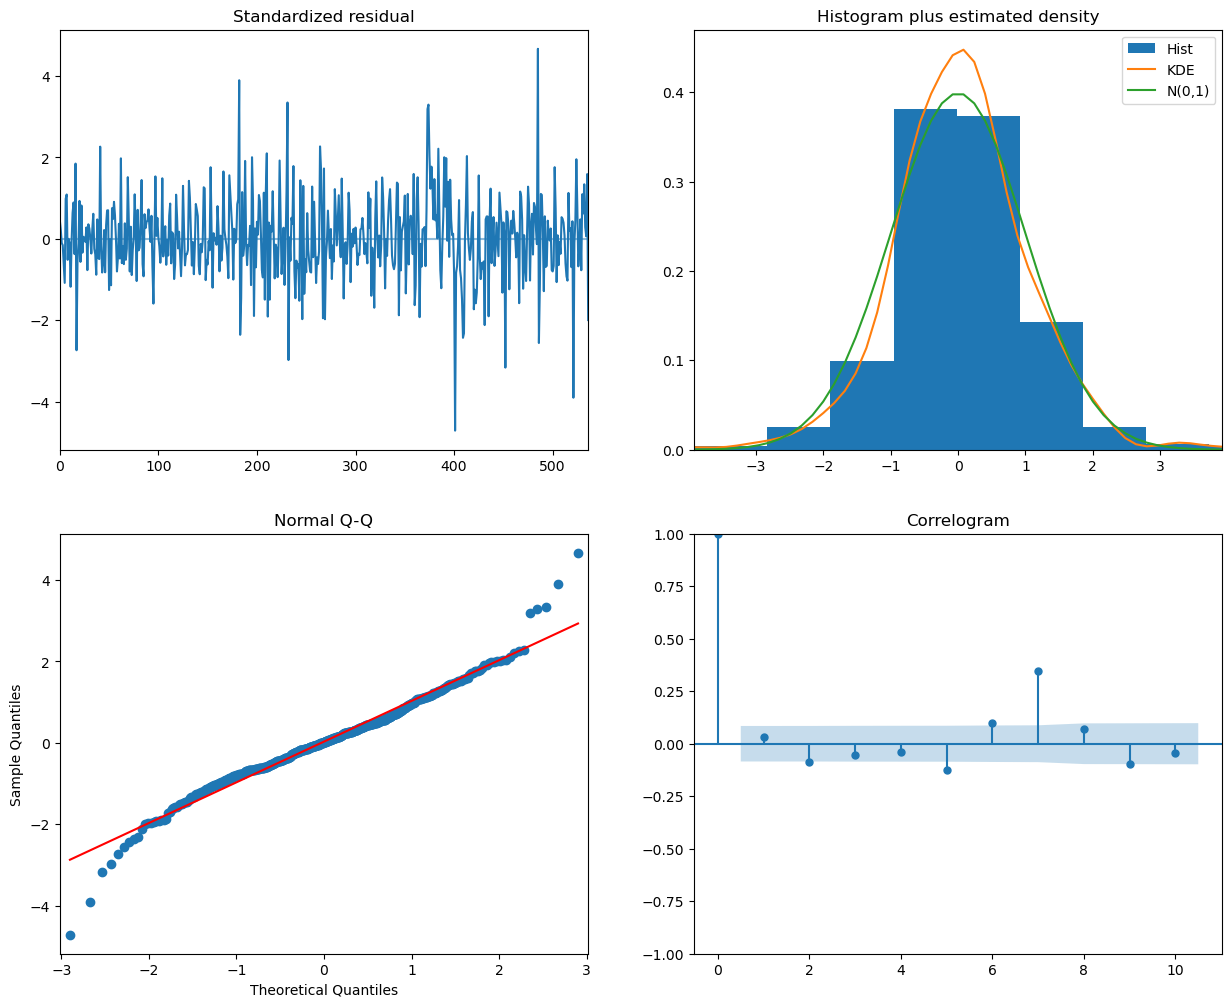

In [36]:

sxmodel.plot_diagnostics(figsize=(15,12))
plt.show()


## Forecasting with Facebook Prophet

In [40]:
# !python -m pip install prophet

In [41]:
from prophet import Prophet

In [43]:
y = ts_log.values

In [44]:
ds= result.columns[5:-1]

In [45]:
data = {'ds': ds, 'y':y}

In [46]:
df= pd.DataFrame(data)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      549 non-null    object 
 1   y       549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [48]:
df['ds'] = df['ds'].astype('datetime64[ns]')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      549 non-null    datetime64[ns]
 1   y       549 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [50]:
model = Prophet()
model.fit(df[['ds','y']][:-40])

18:19:25 - cmdstanpy - INFO - Chain [1] start processing
18:19:25 - cmdstanpy - INFO - Chain [1] done processing


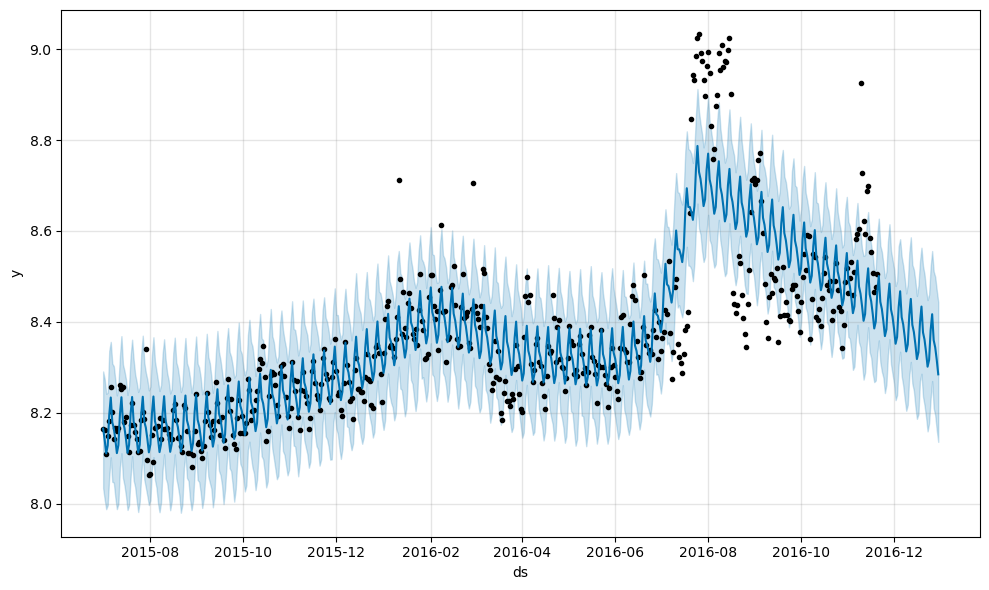

In [51]:
future = model.make_future_dataframe(periods = 40, freq = 'D')
forecast = model.predict(future)
fg = model.plot(forecast)

## Write inferences you made from the data visualizations
1. There are 7 languages plus the media pages. The languages used here are: English, Japanese, German, French, Chinese, Russian, and Spanish. 
Article count as per Language : 
({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})

2. English shows a much higher number of views per page, as might be expected since Wikipedia is a US-based site.

## What does the decomposition of series do?
Decomposition is task in which the Time Series data is decomposed into several component or extracting seasonality, trend from a series data. These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

## What level of differencing gave you a stationary series?
Log-transform stationarity is been applied as After Dickley Fuller test, seems that the data is not stationary and after log tranformation the data is turned out to stationary. 

## Difference between arima, sarima & sarimax.


Arima: 
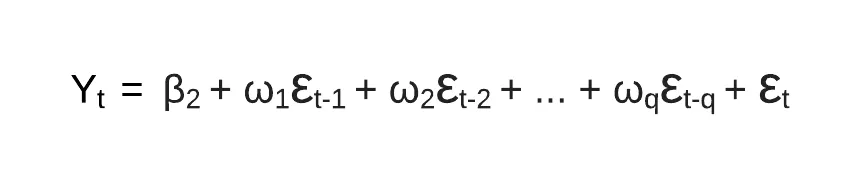
The ARIMA model is an ARMA model yet with a preprocessing step included in the model that we represent I(d) is the difference order, which is the number of transformations needed to make the data stationary. So, an ARIMA model is simply an ARMA model on the differenced time series.

SARIMA: 

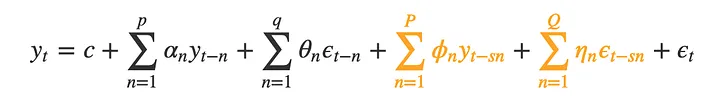

Searson ARIMA also known as SARIMA is a very similar to the ARIMA model, except that there is an additional set of autoregressive and moving average components.The additional lags are offset by the frequency of seasonality (ex. 12 — monthly, 24 — hourly).

SARIMAX: 
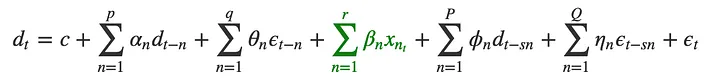

This model takes into account exogenous variables, or in other words, use external data in our forecast. Some real-world examples of exogenous variables include gold price, oil price, outdoor temperature, exchange rate.